## Customers reviews analysis 

Provide analysis of Customers reviews for British Airways and find insights for improvement.


### Scraping data from Skytrax

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flew British Airways on BA ...
1,✅ Trip Verified | BA cancelled the flight fro...
2,✅ Trip Verified | I strongly advise everyone t...
3,✅ Trip Verified | My partner and I were on the...
4,Not Verified | We had a Premium Economy retur...


In [4]:
df.to_csv("BA_reviews.csv")

### Cleaning data

In [5]:
data_cleaned = df.drop_duplicates()

In [6]:

data_cleaned = data_cleaned.dropna(subset=['reviews'])

In [7]:
#Standardize text data
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

data_cleaned['cleaned_reviews'] = data_cleaned['reviews'].apply(clean_text)
data_cleaned.head()

,reviews,cleaned_reviews
0,✅ Trip Verified | Flew British Airways on BA ...,trip verified flew british airways on ba 434 l...
1,✅ Trip Verified | BA cancelled the flight fro...,trip verified ba cancelled the flight from tok...
2,✅ Trip Verified | I strongly advise everyone t...,trip verified i strongly advise everyone to ne...
3,✅ Trip Verified | My partner and I were on the...,trip verified my partner and i were on the ba2...
4,Not Verified | We had a Premium Economy retur...,not verified we had a premium economy return f...


In [8]:
# Define the list of target words
target_words = ["service", "seat", "crew", "staff", "economy", "business", "baggage", "luggage", 
                "communication", "delay", "food", "good", "worst", "flight", "disappointed", "boarding", "canceled"]

# Function to count occurrences of target words
def count_words(text, words):
    text_words = text.split()
    word_counts = {word: 0 for word in words}
    for word in text_words:
        if word in word_counts:
            word_counts[word] += 1
    return word_counts

data_cleaned['word_counts'] = data_cleaned['cleaned_reviews'].apply(lambda x: count_words(x, target_words))


In [9]:
# Summarize the counts
total_counts = {word: 0 for word in target_words}
for index, row in data_cleaned.iterrows():
    for word in target_words:
        total_counts[word] += row['word_counts'][word]

# Convert the summary to a DataFrame for better visualization
summary_df = pd.DataFrame(list(total_counts.items()), columns=['Word', 'Count'])

summary_df

,Word,Count
0,service,734
1,seat,460
2,crew,452
3,staff,398
4,economy,248
5,business,410
6,baggage,134
7,luggage,221
8,communication,20
9,delay,96


In [10]:
import matplotlib.pyplot as plt

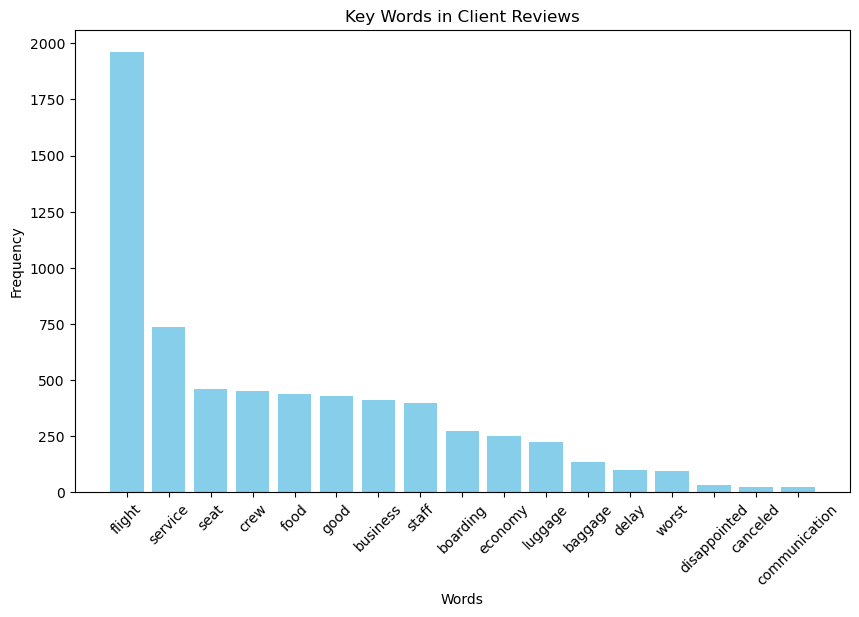

In [11]:
#Sort data for better visualisation

summary_df_sorted = summary_df.sort_values(by='Count', ascending=False)

# Plott data
plt.figure(figsize=(10, 6))
plt.bar(summary_df_sorted['Word'], summary_df_sorted['Count'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Key Words in Client Reviews')
plt.xticks(rotation=45)
plt.show()

### Sentiment analysis

In [12]:
from textblob import TextBlob

In [13]:

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

data_cleaned['sentiment'] = data_cleaned['cleaned_reviews'].apply(get_sentiment)

# Categorize the sentiments
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data_cleaned['sentiment_category'] = data_cleaned['sentiment'].apply(categorize_sentiment)
data_cleaned[['reviews', 'sentiment', 'sentiment_category']].head()

,reviews,sentiment,sentiment_category
0,✅ Trip Verified | Flew British Airways on BA ...,0.305577,Positive
1,✅ Trip Verified | BA cancelled the flight fro...,-0.058333,Negative
2,✅ Trip Verified | I strongly advise everyone t...,-0.031667,Negative
3,✅ Trip Verified | My partner and I were on the...,0.044583,Positive
4,Not Verified | We had a Premium Economy retur...,-0.034256,Negative


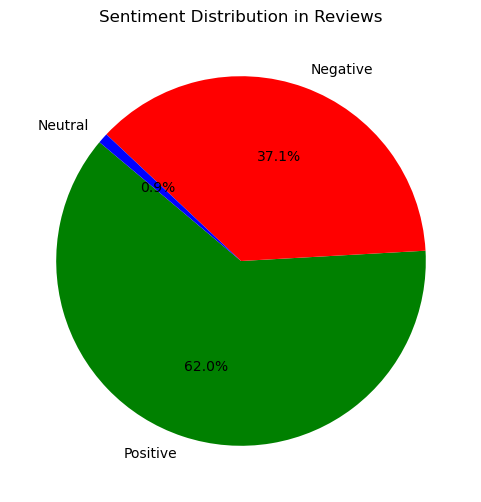

In [14]:
# Plotting sentiment distribution
sentiment_counts = data_cleaned['sentiment_category'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'blue'])
plt.title('Sentiment Distribution in Reviews')
plt.show()


### Conclusion:

The analysis of key words in client reviews reveals critical areas of focus for improving customer
experience. Prioritizing enhancements in flight experience, service quality, seat comfort, and addressing logistical concerns can lead to better overall customer satisfaction and more positive reviews.

The majority of the reviews are positive, indicating that a significant portion of customers have had
good experiences. A substantial portion of the reviews are negative. Only a small fraction of the
reviews are neutral.